# Iris Species

In [2]:
# Veri analizi ve manipülasyonu
import pandas as pd

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import parallel_coordinates

# Makine öğrenimi kütüphaneleri
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# SVM modeli
model = SVC()
model.fit(X_train, y_train)

SVC()

In [6]:
y_pred = model.predict(X_test)

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
from sklearn.model_selection import GridSearchCV

# Parametre grid'i
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi parametreler
print("Best Parameters:", grid_search.best_params_)

# En iyi model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Optimized Accuracy: 1.0


In [9]:
# PCA ile 2 boyuta indirgeme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

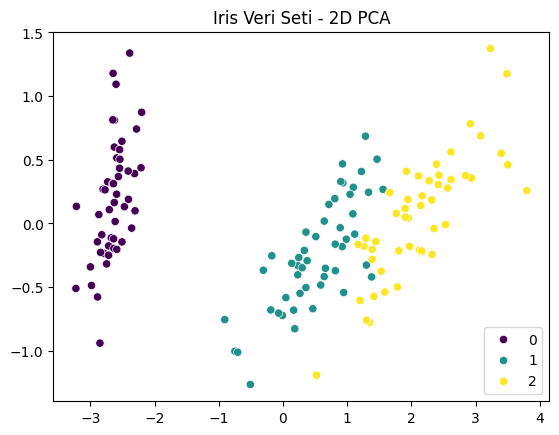

In [10]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target, palette='viridis')
plt.title('Iris Veri Seti - 2D PCA')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
model = SVC()
model.fit(X_train_scaled, y_train)
print("Scaled Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))

Scaled Accuracy: 1.0


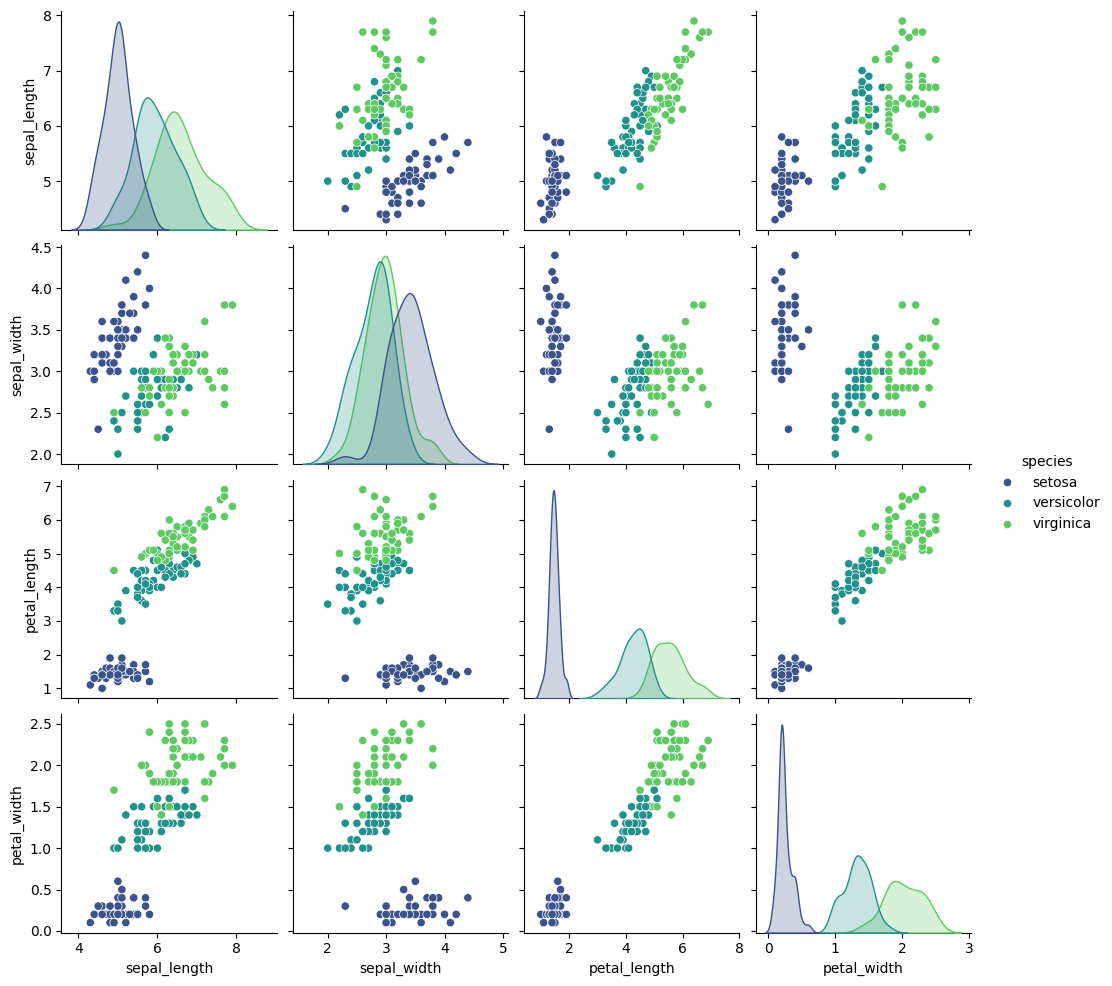

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(sns.load_dataset('iris'), hue='species', palette='viridis')
plt.show()

In [15]:
# Veriyi DataFrame'e dönüştür
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Türleri isimlendir (0: setosa, 1: versicolor, 2: virginica)
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='petal length (cm)', data=iris_df, palette='viridis')
plt.title('Petal Length by Species')
plt.show()

C:\Users\BETÜL\AppData\Local\Temp\ipykernel_17144\230747572.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal length (cm)', data=iris_df, palette='viridis')


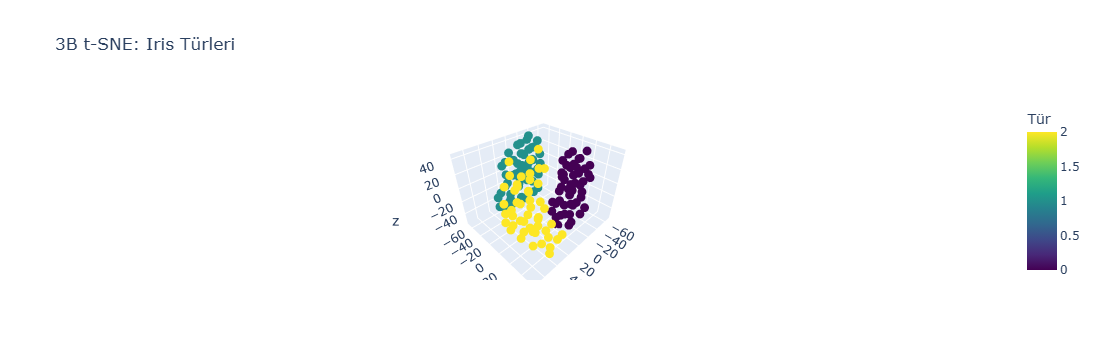

In [16]:
# t-SNE ile 3 boyut
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

fig = px.scatter_3d(
    x=X_tsne[:,0], y=X_tsne[:,1], z=X_tsne[:,2],
    color=y,
    labels={'color': 'Tür'},
    title='3B t-SNE: Iris Türleri',
    color_continuous_scale=px.colors.sequential.Viridis,
    hover_name=iris.target_names[y]
)
fig.update_traces(marker_size=5)
fig.show()

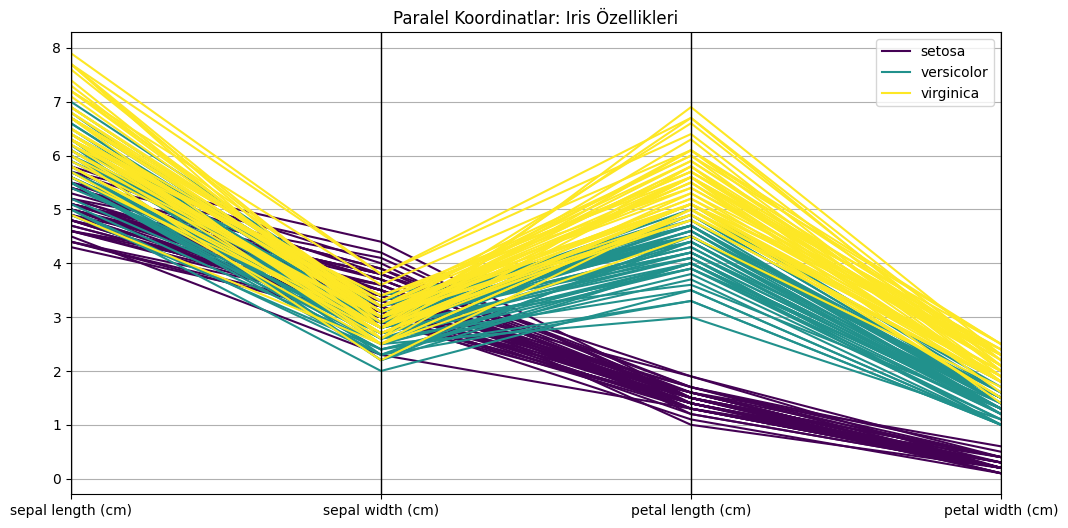

In [17]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

plt.figure(figsize=(12, 6))
parallel_coordinates(df, 'species', colormap='viridis')
plt.title('Paralel Koordinatlar: Iris Özellikleri')
plt.show()